In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [50]:
X,y=make_blobs(1000, centers=2, random_state=3)

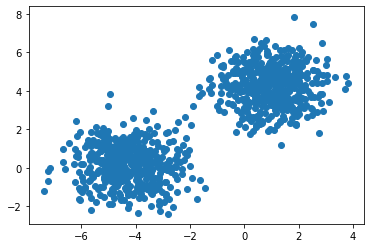

In [51]:
plt.scatter(X[:, 0],X[:, 1])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Customized K neighbour classifier

In [53]:
class KNN:
    def __init__(self,k):
        self.k=k
        self.X=None
        self.y=None
        
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict_point(self,point):
        distances=[]
        for x_item, y_item in zip(self.X,self.y):
            dis=KNN.distance(x_item,point)
            distances.append((dis, y_item))
            
        distances=sorted(distances)
        top=np.array(distances[:self.k])
        
        vals,counts=np.unique(top[:, 1], return_counts=True)
        return vals[np.argmax(counts)]
    def predict(self, X):
        res=[]
        for point in X:
            v=self.predict_point(point)
            res.append(v)
        return np.array(res, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X)==y)/len(y)
    
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1-p2)**2)

In [54]:
model=KNN(5)

In [55]:
model.fit(X_train,y_train)

In [56]:
model.predict(X_test[:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [57]:
model.score(X_test, y_test)

1.0

# KNN of sklearn

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
m2=KNeighborsClassifier(5)

In [38]:
m2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
m2.score(X_test,y_test)

0.9575757575757575